# Collection of dynamic programming algorithms implemented for the Lecture Algorithm Techniques SS25

# Fibonacci Sequence

Ziel ist es die Fibonacci Folge als dynamisches Programm zu implementieren


Im folgenden Code Block wurden zum einen die rekursive Variante der Fibonacci Folge implementiert als auch die dynamische Variante ohne rekursion

In [30]:


def fib_rec(n):

  if n == 0:
    return 0

  if n == 1:
    return 1
  
  return fib_rec(n - 1) + fib_rec(n - 2)


res = fib_rec(6)


def fib_dyn(n):
  cache = [0, 1]
  
  for i in range(2, n + 1):
    res = cache[0] + cache[1]
    cache[0] = cache[1]
    cache[1] = res

  return cache[-1]

res = fib_dyn(6)

print(res)

8


# Climbing stairs

(with help from a yt tutorial)

You are climbing a staircase and it takes you n steps to reach the top you can either go 1 or 2 steps at a time. how many distinct ways can you climb to the top?

In [ ]:


cache = {}

if 3 in cache.keys():
  print(cache[3])


def climb_stairs(n, cache={}):

  print(cache)

  if n in cache.keys():
    return cache[n]

  if n < 2:
    return 1

  answer = 0
  for i in range(1, 3):

    sub_problem = n - i

    if (sub_problem) < 0:
      continue

    else:
      answer += climb_stairs(sub_problem, cache)


  print("here with n {} and answer {}".format(n, answer))
  cache[n] = answer
  return answer


res = climb_stairs(5)

print(res)

# Zahlen-Dreieck

Gegeben sei ein Dreieck mit natürlichen Zahlen (siehe
rechts) abgelegt ein einem n  n Feld a[][]. \
Ein Pfad in diesem Dreieck verläuft immer vom obersten Eintrag zu einem Eintrag in der letzten Zeile, wobei nur zu einem Feld
direkt nach unten oder nach unten rechts gegangen werden
kann. \
Gesucht ist ein Pfad in dem Dreieck mit maximaler Summe der besuchten Einträge. \
Beispiel: Ein Pfad mit maximaler Summe 346 ist in der unteren Abbildung fett dargestellt. \
Er geht über die Spalten 1, 2, 3, 3, 3, 4, 5

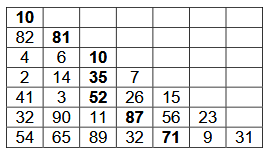

In [116]:
m = [
  [10, -1, -1, -1, -1, -1, -1],
  [82, 81, -1, -1, -1, -1, -1],
  [4 ,  6, 10, -1, -1, -1, -1],
  [2 , 14, 35,  7, -1, -1, -1],
  [41,  3, 52, 26, 15, -1, -1],
  [32, 90, 11, 87, 56, 23, -1],
  [54, 65, 89, 32, 71,  9, 31],
]

m2 = [
    [5, -1, -1],
    [3, 8, -1],
    [2, 4, 6]
]

m3 = [
    [1],
    [2, 3],
    [4, 5, 6],
    [7, 8, 9, 10]
]

def valid_turns(row, col):
  return [
      (row + 1, col),
      (row + 1, col + 1)
  ]


def find_max(cell, m, cache={}):
  row = cell[0]
  col = cell[1]

  val = m[row][col]
  
  if cell in cache:
    print("current computation of {} is using cached cell {} value {}".format(cell, cell, cache[cell]))
    return cache[cell]


  if row == len(m) - 1:
    return val
  
  curr_max = 0 

  for turn in valid_turns(row, col):

    curr_max = max(find_max(turn, m, cache), curr_max)

  cache[cell] = val + curr_max

  return val + curr_max



res = find_max((0, 0), m3)

print(res)

current computation of (2, 1) is using cached cell (2, 1) value 14
20
